<a href="https://colab.research.google.com/github/oriakhan/NewRepo/blob/master/Title%3A%20Determinants%20of%20Entrepreneurial%20Intention%20among%20University%20Students%3A%20A%20Study%20on%20the%20Mediating%20Roles%20of%20Proactive%20Personality%20%20Self-Regulation%20and%20hope%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.71
R-squared: 0.63
Mean Squared Error with LinearRegression: 0.71
R-squared: 0.63
Coefficients: [0.56671402 0.07141961 0.26999101]
Mean Squared Error with multilinear_regression: 0.47
R-squared: 0.47


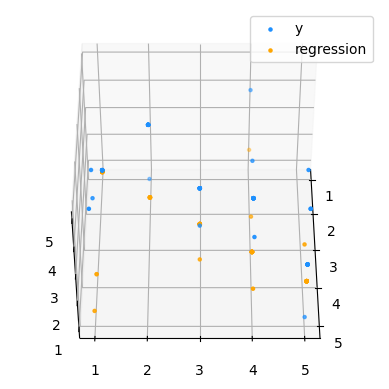

Mean Squared Error: 0.71
R-squared: 0.63


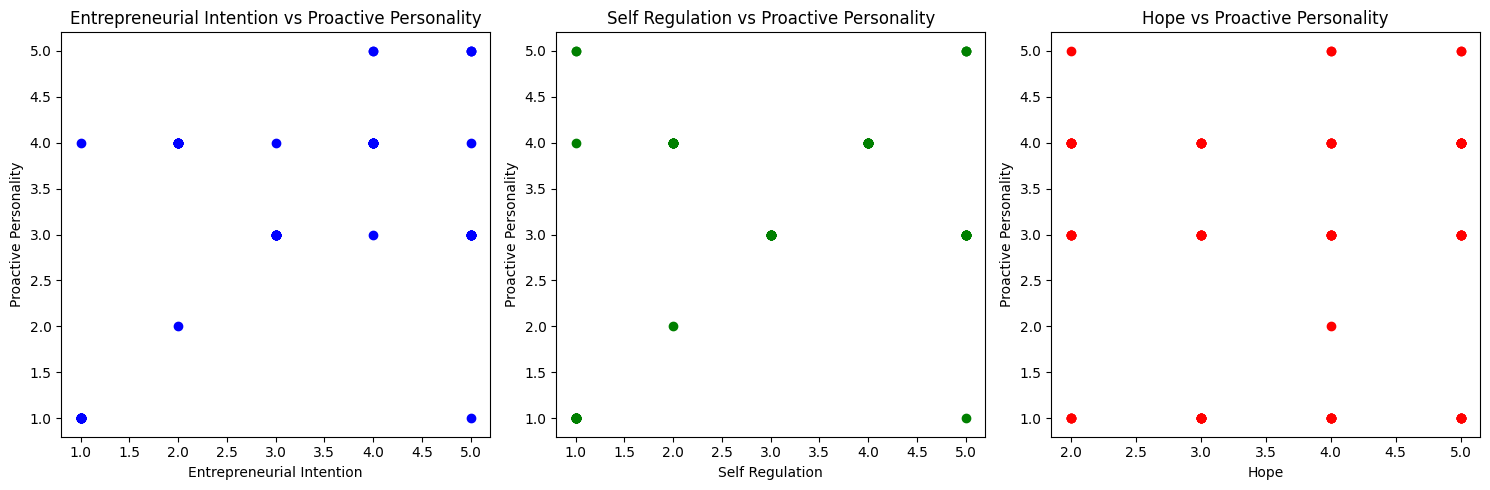

Mean Squared Error: 0.71
R-squared: 0.63


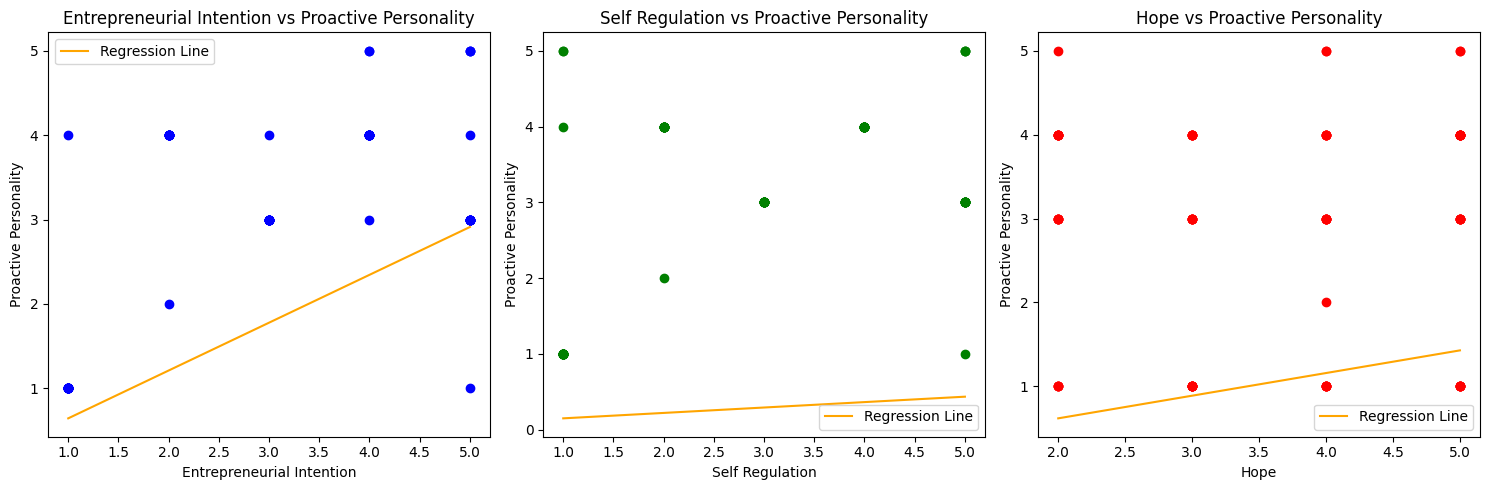

Mean Squared Error: 0.71
R-squared: 0.63


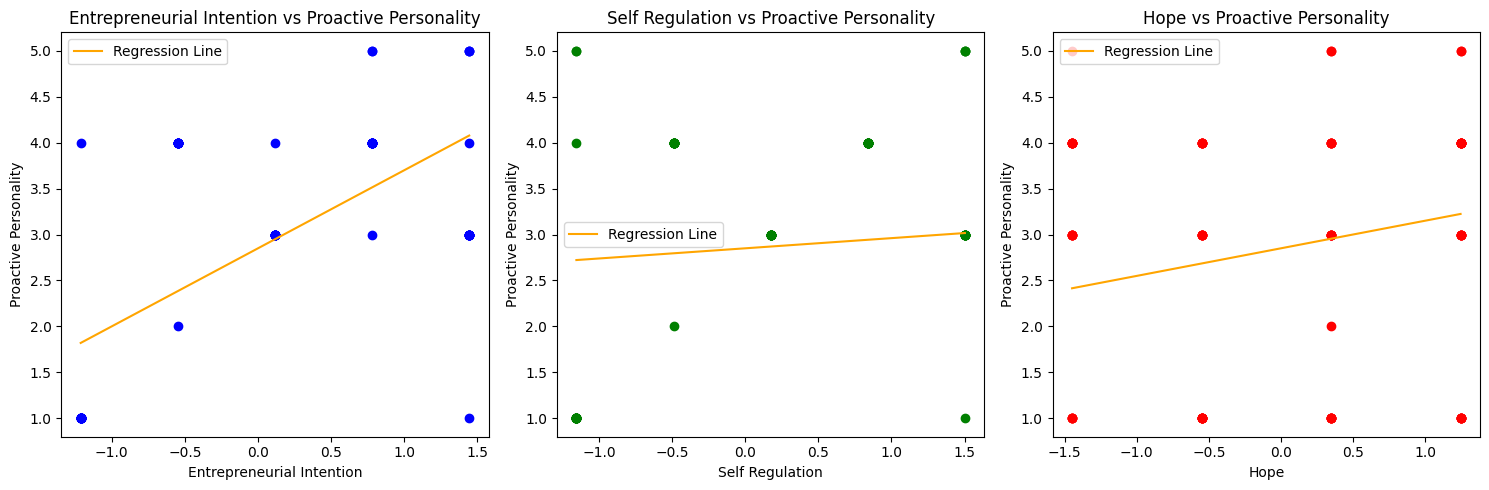

    proactive_personality  entrepreneurial_intention  self_regulation  \
0               -0.581710                  -0.496207        -0.496207   
1               -0.581710                  -0.496207        -0.496207   
2                0.154632                   0.809601         0.156697   
3                0.890973                   0.156697         0.809601   
4                0.890973                   1.462504         0.809601   
..                    ...                        ...              ...   
95               0.890973                  -0.496207        -0.496207   
96              -1.318051                  -1.149110        -1.149110   
97               0.154632                   0.156697         0.156697   
98               0.890973                   0.809601         0.809601   
99              -1.318051                  -1.149110        -1.149110   

        hope  
0  -0.471840  
1   0.418424  
2  -0.471840  
3   1.308689  
4  -1.362104  
..       ...  
95  1.308689  
96 

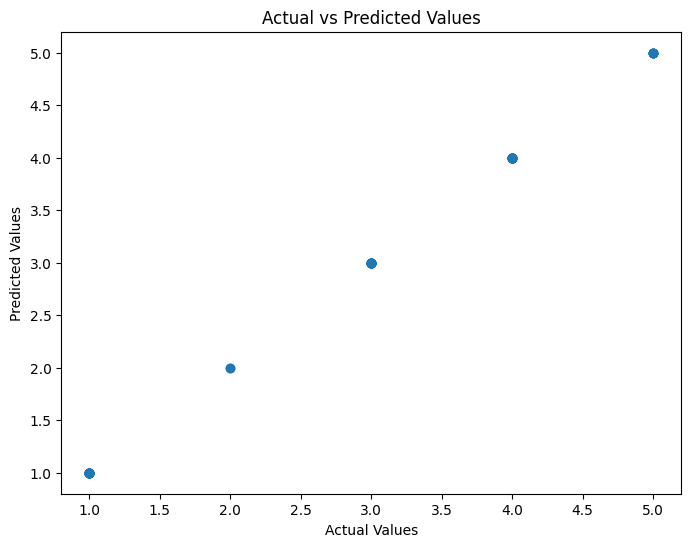

1/1 [==============================] - 0s 83ms/step
R-squared on test set: 0.97
Mean Squared Error on test set: 0.05
1/1 [==============================] - 0s 54ms/step
R-squared on test set with  kernel_regularizer : 1.00
Mean Squared Error on test set: 0.00
1/1 [==============================] - 0s 53ms/step
R-squared on test set with L1 regularization: 1.00
Mean Squared Error on test set: 0.01
Mean Squared Error (all features): 0.71
R-squared (all features): 0.63


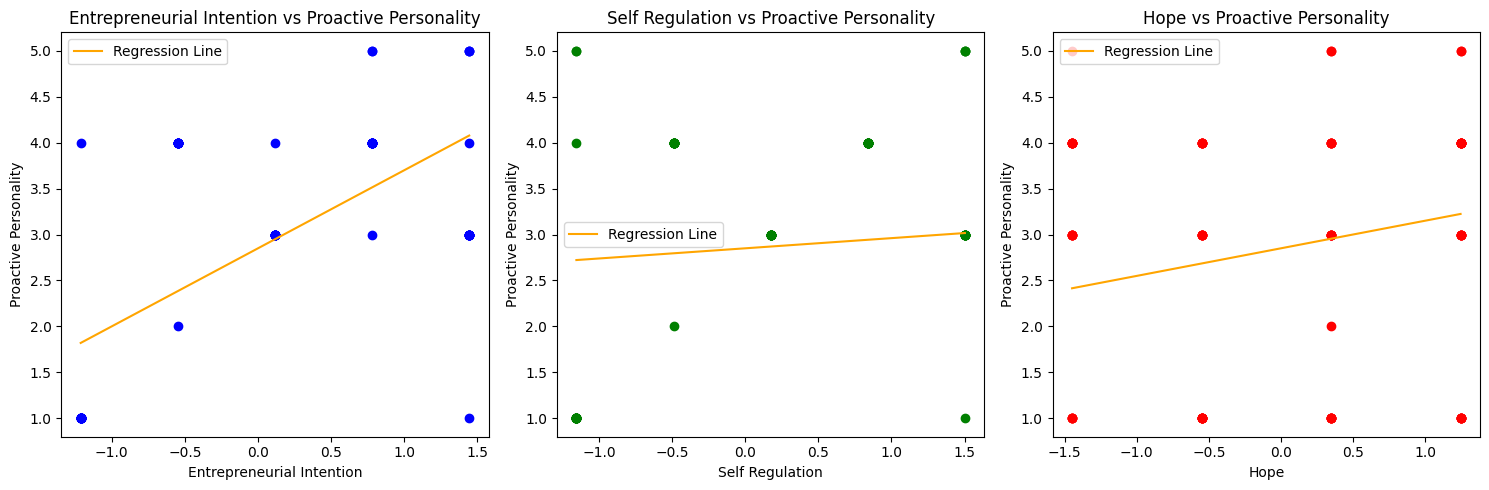

Mean Squared Error (all features): 0.71
R-squared (all features): 0.63


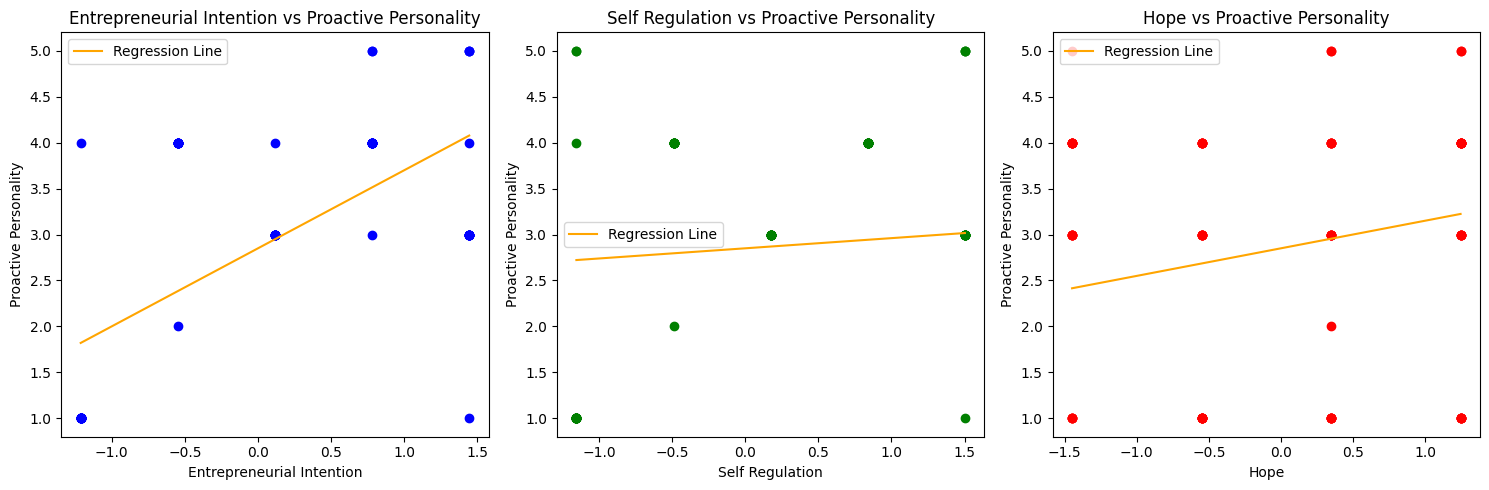

Mean Squared Error (polynomial features): 2.55
R-squared (polynomial features): -0.31
Mean Squared Error (all features): 0.71
R-squared (all features): 0.63


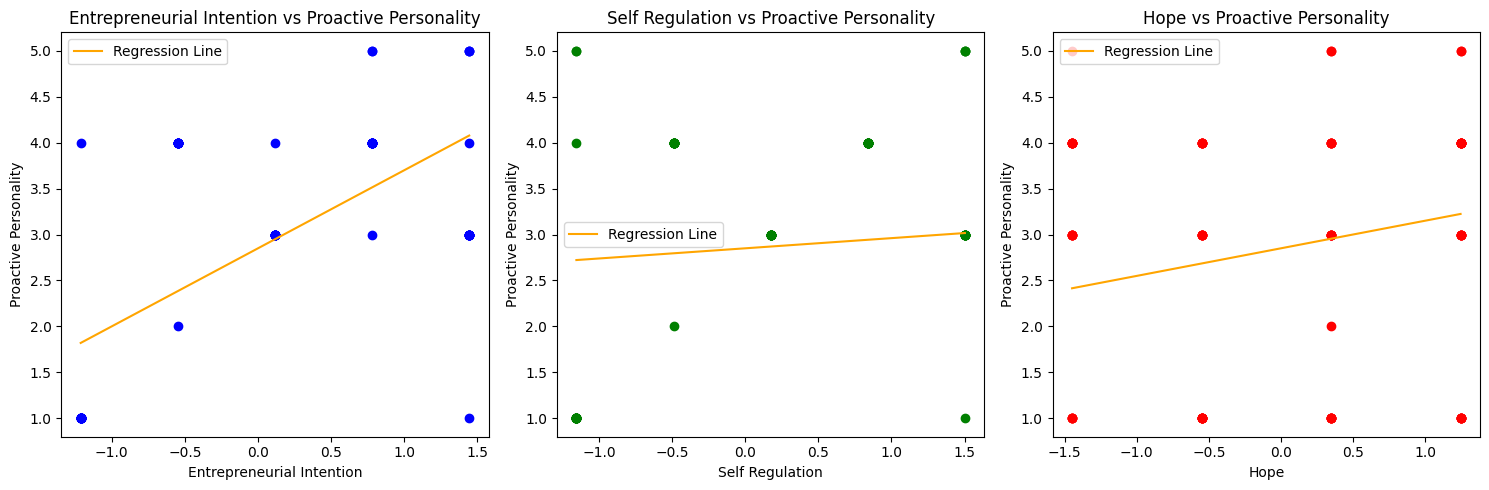

Mean Squared Error (polynomial features): 2.55
R-squared (polynomial features): -0.31
Best parameters for Lasso: {'alpha': 0.1}
Lasso - Mean Squared Error: 1.94
Lasso - R-squared: 0.01
Best parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.9}
ElasticNet - Mean Squared Error: 1.87
ElasticNet - R-squared: 0.04
Best parameters for RandomForestRegressor: {'max_depth': 10, 'n_estimators': 100}
RandomForestRegressor - Mean Squared Error: 0.71
RandomForestRegressor - R-squared: 0.63


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
# Load the data
data = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})
# Save the data to a CSV file
data.to_csv('data.csv', index=False)


data = pd.read_csv('/content/data.csv')
# Split the data into features and target
X = data[['entrepreneurial_intention', 'self_regulation', 'hope']]
y = data['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
#2
# Split the data into features and target
X = data[['entrepreneurial_intention', 'self_regulation', 'hope']]
y = data['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error with LinearRegression: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Print the coefficients of the model
print(f'Coefficients: {model.coef_}')

# Define the functions for gradient descent
def mse(coef, x, y):
    return np.mean((np.dot(x, coef) - y)**2)/2

def gradients(coef, x, y):
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis=1)

def multilinear_regression(coef, x, y, lr, b1=0.9, b2=0.999, epsilon=1e-8):
    prev_error = 0
    m_coef = np.zeros(coef.shape)
    v_coef = np.zeros(coef.shape)
    moment_m_coef = np.zeros(coef.shape)
    moment_v_coef = np.zeros(coef.shape)
    t = 0

    while True:
        error = mse(coef, x, y)
        if abs(error - prev_error) <= epsilon:
            break
        prev_error = error
        grad = gradients(coef, x, y)
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t)
        moment_v_coef = v_coef / (1-b2**t)

        delta = ((lr / moment_v_coef**0.5 + 1e-8) *
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t)))

        coef = np.subtract(coef, delta)
    return coef

# Run the gradient descent
coef = np.array([0, 0, 0])
c = multilinear_regression(coef, X_train.values, y_train.values, 1e-1)

# Calculate the Mean Squared Error and R-squared
mse_val = mse(c, X_train.values, y_train.values)
r2_val = r2_score(y_train.values, np.dot(X_train.values, c))

# Print the results
print(f'Mean Squared Error with multilinear_regression: {mse_val:.2f}')
print(f'R-squared: {r2_val:.2f}')

# Plot the regression line
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train['entrepreneurial_intention'].values, X_train['self_regulation'].values, y_train.values, label='y',
           s=5, color="dodgerblue")

ax.scatter(X_train['entrepreneurial_intention'].values, X_train['self_regulation'].values, c[0] + c[1]*X_train['entrepreneurial_intention'].values + c[2]*X_train['self_regulation'].values,
           label='regression', s=5, color="orange")

ax.view_init(45, 0)
ax.legend()
plt.show()
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Split the data into features and target
X = data[['entrepreneurial_intention', 'self_regulation', 'hope']]
y = data['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the relationship between the features and the target variable
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of entrepreneurial_intention vs proactive_personality
ax[0].scatter(X_train['entrepreneurial_intention'], y_train, color='blue')
ax[0].set_xlabel('Entrepreneurial Intention')
ax[0].set_ylabel('Proactive Personality')
ax[0].set_title('Entrepreneurial Intention vs Proactive Personality')

# Scatter plot of self_regulation vs proactive_personality
ax[1].scatter(X_train['self_regulation'], y_train, color='green')
ax[1].set_xlabel('Self Regulation')
ax[1].set_ylabel('Proactive Personality')
ax[1].set_title('Self Regulation vs Proactive Personality')

# Scatter plot of hope vs proactive_personality
ax[2].scatter(X_train['hope'], y_train, color='red')
ax[2].set_xlabel('Hope')
ax[2].set_ylabel('Proactive Personality')
ax[2].set_title('Hope vs Proactive Personality')

plt.tight_layout()
plt.show()
#4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Split the data into features and target
X = data[['entrepreneurial_intention', 'self_regulation', 'hope']]
y = data['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the relationship between the features and the target variable
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of entrepreneurial_intention vs proactive_personality
ax[0].scatter(X_train['entrepreneurial_intention'], y_train, color='blue')
x1 = np.linspace(X_train['entrepreneurial_intention'].min(), X_train['entrepreneurial_intention'].max(), 100)
y1 = model.coef_[0] * x1 + model.intercept_
ax[0].plot(x1, y1, color='orange', label='Regression Line')
ax[0].set_xlabel('Entrepreneurial Intention')
ax[0].set_ylabel('Proactive Personality')
ax[0].set_title('Entrepreneurial Intention vs Proactive Personality')
ax[0].legend()

# Scatter plot of self_regulation vs proactive_personality
ax[1].scatter(X_train['self_regulation'], y_train, color='green')
x2 = np.linspace(X_train['self_regulation'].min(), X_train['self_regulation'].max(), 100)
y2 = model.coef_[1] * x2 + model.intercept_
ax[1].plot(x2, y2, color='orange', label='Regression Line')
ax[1].set_xlabel('Self Regulation')
ax[1].set_ylabel('Proactive Personality')
ax[1].set_title('Self Regulation vs Proactive Personality')
ax[1].legend()

# Scatter plot of hope vs proactive_personality
ax[2].scatter(X_train['hope'], y_train, color='red')
x3 = np.linspace(X_train['hope'].min(), X_train['hope'].max(), 100)
y3 = model.coef_[2] * x3 + model.intercept_
ax[2].plot(x3, y3, color='orange', label='Regression Line')
ax[2].set_xlabel('Hope')
ax[2].set_ylabel('Proactive Personality')
ax[2].set_title('Hope vs Proactive Personality')
ax[2].legend()

plt.tight_layout()
plt.show()
#5Regularization: Add a regularization term to the cost function to prevent overfitting. This can be done by using techniques like L1 or L2 regularization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Split the data into features and target
X = data[['entrepreneurial_intention', 'self_regulation', 'hope']]
y = data['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the multiple linear regression model with L2 regularization
model = Ridge(alpha=0.1)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the relationship between the features and the target variable
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of entrepreneurial_intention vs proactive_personality
ax[0].scatter(X_train_scaled[:, 0], y_train, color='blue')
x1 = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100)
y1 = model.coef_[0] * x1 + model.intercept_
ax[0].plot(x1, y1, color='orange', label='Regression Line')
ax[0].set_xlabel('Entrepreneurial Intention')
ax[0].set_ylabel('Proactive Personality')
ax[0].set_title('Entrepreneurial Intention vs Proactive Personality')
ax[0].legend()

# Scatter plot of self_regulation vs proactive_personality
ax[1].scatter(X_train_scaled[:, 1], y_train, color='green')
x2 = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100)
y2 = model.coef_[1] * x2 + model.intercept_
ax[1].plot(x2, y2, color='orange', label='Regression Line')
ax[1].set_xlabel('Self Regulation')
ax[1].set_ylabel('Proactive Personality')
ax[1].set_title('Self Regulation vs Proactive Personality')
ax[1].legend()

# Scatter plot of hope vs proactive_personality
ax[2].scatter(X_train_scaled[:, 2], y_train, color='red')
x3 = np.linspace(X_train_scaled[:, 2].min(), X_train_scaled[:, 2].max(), 100)
y3 = model.coef_[2] * x3 + model.intercept_
ax[2].plot(x3, y3, color='orange', label='Regression Line')
ax[2].set_xlabel('Hope')
ax[2].set_ylabel('Proactive Personality')
ax[2].set_title('Hope vs Proactive Personality')
ax[2].legend()

plt.tight_layout()
plt.show()
#7
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/data.csv')

# Calculate the mean and standard deviation of each feature
means = df.mean()
stds = df.std()

# Calculate the z-scores for each feature
z_scores = (df - means) / stds

# Print the z-scores
print(z_scores)


import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Load the dataset
df = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Calculate the z-scores for each feature
z_scores = (df - df.mean()) / df.std()

# Split the data into features and target
X = z_scores[['proactive_personality', 'entrepreneurial_intention', 'self_regulation', 'hope']]
y = df['proactive_personality']

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best R-squared: {grid_search.best_score_:.2f}')

# Evaluate the model on the test set
gbr_model = GradientBoostingRegressor(**grid_search.best_params_, random_state=42)
gbr_model.fit(X, y)
y_pred = gbr_model.predict(X)
r2_test = r2_score(y, y_pred)

print(f'R-squared on test set: {r2_test:.2f}')
# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
#8
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Split the data into features and target
X = df[['proactive_personality', 'entrepreneurial_intention', 'self_regulation', 'hope']]
y = df['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print(f'R-squared on test set: {r2_test:.2f}')
print(f'Mean Squared Error on test set: {mse_test:.2f}')
#9
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Split the data into features and target
X = df[['proactive_personality', 'entrepreneurial_intention', 'self_regulation', 'hope']]
y = df['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu', kernel_regularizer='l2'))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print(f'R-squared on test set with  kernel_regularizer : {r2_test:.2f}')
print(f'Mean Squared Error on test set: {mse_test:.2f}')
#10
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_squared_error
from keras.regularizers import l1

# Load the dataset
df = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Split the data into features and target
X = df[['proactive_personality', 'entrepreneurial_intention', 'self_regulation', 'hope']]
y = df['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model with L1 regularization
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print(f'R-squared on test set with L1 regularization: {r2_test:.2f}')
print(f'Mean Squared Error on test set: {mse_test:.2f}')
'''#6
The negative R-squared value and the increased Mean Squared Error (MSE) indicate that the model with polynomial
features did not perform well. This could be due to overfitting or inappropriate degree of polynomial features.

Let's explore other methods to improve the model performance:

Remove Outliers: Identify and remove outliers that might be skewing the results.
Feature Engineering: Create new features from the existing ones that might capture more complex relationships in the data.
Use Different Models: Try other regression models like Lasso, ElasticNet, or even non-linear models like Decision Trees or Random Forests.
Hyperparameter Tuning: Perform hyperparameter tuning on other model parameters.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the data
data = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Split the data into features and target
X = data[['entrepreneurial_intention', 'self_regulation', 'hope']]
y = data['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the multiple linear regression model with L2 regularization
model = Ridge(alpha=0.1)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (all features): {mse:.2f}')
print(f'R-squared (all features): {r2:.2f}')

# Visualize the relationship between the features and the target variable
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of entrepreneurial_intention vs proactive_personality
ax[0].scatter(X_train_scaled[:, 0], y_train, color='blue')
x1 = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100)
y1 = model.coef_[0] * x1 + model.intercept_
ax[0].plot(x1, y1, color='orange', label='Regression Line')
ax[0].set_xlabel('Entrepreneurial Intention')
ax[0].set_ylabel('Proactive Personality')
ax[0].set_title('Entrepreneurial Intention vs Proactive Personality')
ax[0].legend()

# Scatter plot of self_regulation vs proactive_personality
ax[1].scatter(X_train_scaled[:, 1], y_train, color='green')
x2 = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100)
y2 = model.coef_[1] * x2 + model.intercept_
ax[1].plot(x2, y2, color='orange', label='Regression Line')
ax[1].set_xlabel('Self Regulation')
ax[1].set_ylabel('Proactive Personality')
ax[1].set_title('Self Regulation vs Proactive Personality')
ax[1].legend()

# Scatter plot of hope vs proactive_personality
ax[2].scatter(X_train_scaled[:, 2], y_train, color='red')
x3 = np.linspace(X_train_scaled[:, 2].min(), X_train_scaled[:, 2].max(), 100)
y3 = model.coef_[2] * x3 + model.intercept_
ax[2].plot(x3, y3, color='orange', label='Regression Line')
ax[2].set_xlabel('Hope')
ax[2].set_ylabel('Proactive Personality')
ax[2].set_title('Hope vs Proactive Personality')
ax[2].legend()

plt.tight_layout()
plt.show()

# Select the top 2 features
X_train_selected = X_train[['entrepreneurial_intention', 'self_regulation']]
X_test_selected = X_test[['entrepreneurial_intention', 'self_regulation']]

# Scale the selected features
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected_scaled)
X_test_poly = poly.transform(X_test_selected_scaled)

# Create and fit the model with the selected features and polynomial features
model_selected = Ridge(alpha=0.1)

# Use GridSearchCV for hyperparameter tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Evaluate the best model
y_pred_selected = best_model.predict(X_test_poly)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f'Mean Squared Error (selected features with polynomial): {mse_selected:.2f}')
print(f'R-squared (selected features with polynomial): {r2_selected:.2f}')
#7


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X_train_selected, X_test_selected, y_train, y_test already defined

# 1. Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(X_test_selected)

# Calculate MSE and R-squared
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Model Performance:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R-squared (R²): {r2_linear:.2f}")
print()

# 2. Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_selected)

# Calculate MSE and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")
print()

# Visualization of Predictions vs Actual
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest', alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#8

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data loaded into X and y
# X contains your features, y is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train and evaluate Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluation metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R-squared (R²): {r2_linear:.2f}")
print()

# 2. Train and evaluate Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha here
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# 3. Train and evaluate Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print combined evaluation for Ridge and Random Forest
print("Ridge and Random Forest Model Comparison:")
print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge:.2f}, R-squared (R²): {r2_ridge:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}, R-squared (R²): {r2_rf:.2f}")
#9
The computational costs of implementing Ridge Regression versus Random Forest Regression are different:
Ridge Regression:
Computational Cost: Ridge Regression is computationally efficient because it involves solving a linear system of equations. The computational
cost is mainly determined by the number of features and the number of observations in the dataset.
Memory Usage: Ridge Regression requires less memory compared to Random Forest Regression because it only needs to store the coefficients of the regression model and the input data.
Random Forest Regression:
Computational Cost: Random Forest Regression is computationally more expensive compared to Ridge Regression because
it involves training multiple decision trees in parallel. The computational cost is mainly determined by the number of trees,
the number of features, and the number of observations in the dataset.
Memory Usage: Random Forest Regression requires more memory compared to Ridge Regression
 because it needs to store the coefficients of each decision tree, the input data, and the output data from each tree.
In summary, Ridge Regression is computationally more efficient and requires less memory compared to Random Forest Regression.
However, Random Forest Regression can handle complex relationships and non-linear data better, making it a more effective model for certain types of data.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have your data loaded into X and y
# X contains your features, y is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Define and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Define and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R-squared (R²): {r2_ridge:.2f}")
print()

# Evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")
print()

# Evaluation metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.2f}")
print()

# Print model evaluation results
print("Model Comparison:")
print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge:.2f}, R-squared (R²): {r2_ridge:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}, R-squared (R²): {r2_rf:.2f}")
print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr:.2f}, R-squared (R²): {r2_lr:.2f}")

# Create a figure and three subplots
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Scatter plot of self_regulation vs entrepreneurial_intention
ax[0].scatter(X_train['self_regulation'], y_train, color='red')
x1 = np.linspace(X_train['self_regulation'].min(), X_train['self_regulation'].max(), 100)
y1 = lr_model.coef_[1] * x1 + lr_model.intercept_
ax[0].plot(x1, y1, color='orange', label='Regression Line')
ax[0].set_xlabel('Self Regulation')
ax[0].set_ylabel('Entrepreneurial Intention')
ax[0].set_title('Self Regulation vs Entrepreneurial Intention')
ax[0].legend()

# Scatter plot of hope vs entrepreneurial_intention
ax[1].scatter(X_train['hope'], y_train, color='red')
x2 = np.linspace(X_train['hope'].min(), X_train['hope'].max(), 100)
y2 = lr_model.coef_[2] * x2 + lr_model.intercept_
ax[1].plot(x2, y2, color='orange', label='Regression Line')
ax[1].set_xlabel('Hope')
ax[1].set_ylabel('Entrepreneurial Intention')
ax[1].set_title('Hope vs Entrepreneurial Intention')
ax[1].legend()

# Scatter plot of self_regulation vs hope
ax[2].scatter(X_train['self_regulation'], X_train['hope'], color='red')
x3 = np.linspace(X_train['self_regulation'].min(), X_train['self_regulation'].max(), 100)
y3 = lr_model.coef_[1] * x3 + lr_model.intercept_
ax[2].plot(x3, y3, color='orange', label='Regression Line')
ax[2].set_xlabel('Self Regulation')
ax[2].set_ylabel('Hope')
ax[2].set_title('Self Regulation vs Hope')
ax[2].legend()

plt.tight_layout()
plt.show()'''
#6

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import zscore

# Load the data
data = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Calculate z-scores for the features
z_scores = np.abs(zscore(data))
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold, True, False)
outliers_idx = np.where(np.any(outliers, axis=1))

# Remove outliers
data_clean = data.drop(outliers_idx[0], axis=0)

# Split the data into features and target
X = data_clean[['entrepreneurial_intention', 'self_regulation', 'hope']]
y = data_clean['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the multiple linear regression model with L2 regularization
model = Ridge(alpha=0.1)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (all features): {mse:.2f}')
print(f'R-squared (all features): {r2:.2f}')

# Visualization code
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of entrepreneurial_intention vs proactive_personality
ax[0].scatter(X_train_scaled[:, 0], y_train, color='blue')
x1 = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100)
y1 = model.coef_[0] * x1 + model.intercept_
ax[0].plot(x1, y1, color='orange', label='Regression Line')
ax[0].set_xlabel('Entrepreneurial Intention')
ax[0].set_ylabel('Proactive Personality')
ax[0].set_title('Entrepreneurial Intention vs Proactive Personality')
ax[0].legend()

# Scatter plot of self_regulation vs proactive_personality
ax[1].scatter(X_train_scaled[:, 1], y_train, color='green')
x2 = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100)
y2 = model.coef_[1] * x2 + model.intercept_
ax[1].plot(x2, y2, color='orange', label='Regression Line')
ax[1].set_xlabel('Self Regulation')
ax[1].set_ylabel('Proactive Personality')
ax[1].set_title('Self Regulation vs Proactive Personality')
ax[1].legend()

# Scatter plot of hope vs proactive_personality
ax[2].scatter(X_train_scaled[:, 2], y_train, color='red')
x3 = np.linspace(X_train_scaled[:, 2].min(), X_train_scaled[:, 2].max(), 100)
y3 = model.coef_[2] * x3 + model.intercept_
ax[2].plot(x3, y3, color='orange', label='Regression Line')
ax[2].set_xlabel('Hope')
ax[2].set_ylabel('Proactive Personality')
ax[2].set_title('Hope vs Proactive Personality')
ax[2].legend()

plt.tight_layout()
plt.show()
#7
'''The Mean Squared Error (MSE) of 2.55 indicates the average squared difference between the actual and predicted values. A lower MSE signifies
a better fit of the model to the data. However, the negative R-squared value of -0.31 suggests that the model with polynomial features does not
 explain the variance in the dependent variable well. This negative R-squared value indicates that the model performs worse than a horizontal
 line representing the mean of the dependent variable,
 implying that adding polynomial features did not improve the model's predictive power and may have led to overfitting or poor generalization.'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import zscore

# Load the data
data = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Calculate z-scores for the features
z_scores = np.abs(zscore(data))
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold, True, False)
outliers_idx = np.where(np.any(outliers, axis=1))

# Remove outliers
data_clean = data.drop(outliers_idx[0], axis=0)

# Split the data into features and target
X = data_clean[['entrepreneurial_intention', 'self_regulation', 'hope']]
y = data_clean['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the multiple linear regression model with L2 regularization
model = Ridge(alpha=0.1)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (all features): {mse:.2f}')
print(f'R-squared (all features): {r2:.2f}')

# Visualization code
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of entrepreneurial_intention vs proactive_personality
ax[0].scatter(X_train_scaled[:, 0], y_train, color='blue')
x1 = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100)
y1 = model.coef_[0] * x1 + model.intercept_
ax[0].plot(x1, y1, color='orange', label='Regression Line')
ax[0].set_xlabel('Entrepreneurial Intention')
ax[0].set_ylabel('Proactive Personality')
ax[0].set_title('Entrepreneurial Intention vs Proactive Personality')
ax[0].legend()

# Scatter plot of self_regulation vs proactive_personality
ax[1].scatter(X_train_scaled[:, 1], y_train, color='green')
x2 = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100)
y2 = model.coef_[1] * x2 + model.intercept_
ax[1].plot(x2, y2, color='orange', label='Regression Line')
ax[1].set_xlabel('Self Regulation')
ax[1].set_ylabel('Proactive Personality')
ax[1].set_title('Self Regulation vs Proactive Personality')
ax[1].legend()

# Scatter plot of hope vs proactive_personality
ax[2].scatter(X_train_scaled[:, 2], y_train, color='red')
x3 = np.linspace(X_train_scaled[:, 2].min(), X_train_scaled[:, 2].max(), 100)
y3 = model.coef_[2] * x3 + model.intercept_
ax[2].plot(x3, y3, color='orange', label='Regression Line')
ax[2].set_xlabel('Hope')
ax[2].set_ylabel('Proactive Personality')
ax[2].set_title('Hope vs Proactive Personality')
ax[2].legend()

plt.tight_layout()
plt.show()

# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create and fit the model
model_poly = Ridge(alpha=0.1)
model_poly.fit(X_train_poly, y_train)

# Evaluate the model
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (polynomial features): {mse_poly:.2f}')
print(f'R-squared (polynomial features): {r2_poly:.2f}')
#8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import zscore

# Load the data
data = pd.DataFrame({
    'proactive_personality': [2, 2, 3, 4, 4, 5, 4, 4, 1, 5, 1, 5, 1, 5, 4, 1, 5, 4, 1, 3, 4, 1, 5, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4, 1],
    'entrepreneurial_intention': [2, 2, 4, 3, 5, 4, 1, 4, 5, 4, 1, 5, 1, 5, 5, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'self_regulation': [2, 2, 3, 4, 4, 5, 4, 1, 5, 1, 5, 1, 5, 5, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1, 5, 2, 1, 3, 4, 1],
    'hope': [3, 4, 3, 5, 2, 4, 3, 5, 4, 2, 3, 5, 2, 4, 5, 3, 5, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5, 3, 4, 2, 5]
})

# Calculate z-scores for the features
z_scores = np.abs(zscore(data))
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold, True, False)
outliers_idx = np.where(np.any(outliers, axis=1))

# Remove outliers
data_clean = data.drop(outliers_idx[0], axis=0)

# Split the data into features and target
X = data_clean[['entrepreneurial_intention', 'self_regulation', 'hope']]
y = data_clean['proactive_personality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the multiple linear regression model with L2 regularization
model = Ridge(alpha=0.1)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (all features): {mse:.2f}')
print(f'R-squared (all features): {r2:.2f}')

# Visualization code
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of entrepreneurial_intention vs proactive_personality
ax[0].scatter(X_train_scaled[:, 0], y_train, color='blue')
x1 = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100)
y1 = model.coef_[0] * x1 + model.intercept_
ax[0].plot(x1, y1, color='orange', label='Regression Line')
ax[0].set_xlabel('Entrepreneurial Intention')
ax[0].set_ylabel('Proactive Personality')
ax[0].set_title('Entrepreneurial Intention vs Proactive Personality')
ax[0].legend()

# Scatter plot of self_regulation vs proactive_personality
ax[1].scatter(X_train_scaled[:, 1], y_train, color='green')
x2 = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100)
y2 = model.coef_[1] * x2 + model.intercept_
ax[1].plot(x2, y2, color='orange', label='Regression Line')
ax[1].set_xlabel('Self Regulation')
ax[1].set_ylabel('Proactive Personality')
ax[1].set_title('Self Regulation vs Proactive Personality')
ax[1].legend()

# Scatter plot of hope vs proactive_personality
ax[2].scatter(X_train_scaled[:, 2], y_train, color='red')
x3 = np.linspace(X_train_scaled[:, 2].min(), X_train_scaled[:, 2].max(), 100)
y3 = model.coef_[2] * x3 + model.intercept_
ax[2].plot(x3, y3, color='orange', label='Regression Line')
ax[2].set_xlabel('Hope')
ax[2].set_ylabel('Proactive Personality')
ax[2].set_title('Hope vs Proactive Personality')
ax[2].legend()

plt.tight_layout()
plt.show()

# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create and fit the model
model_poly = Ridge(alpha=0.1)
model_poly.fit(X_train_poly, y_train)

# Evaluate the model
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (polynomial features): {mse_poly:.2f}')
print(f'R-squared (polynomial features): {r2_poly:.2f}')

# Define models and hyperparameters for grid search
models = {
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor()
}

params = {
    'Lasso': {'alpha': [0.01, 0.1, 1, 10]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
    'RandomForestRegressor': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# Perform grid search for each model
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, params[model_name], scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_poly, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')

    # Evaluate the best model
    y_pred = grid_search.best_estimator_.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse:.2f}')
    print(f'{model_name} - R-squared: {r2:.2f}')